BIOVOLUME mean: 222.94
PERI mean: 36.45


BIOVOLUME median: 50.0
PERI median: 20.0


BIOVOLUME standard deviation: 365.0
PERI standard deviation: 39.33




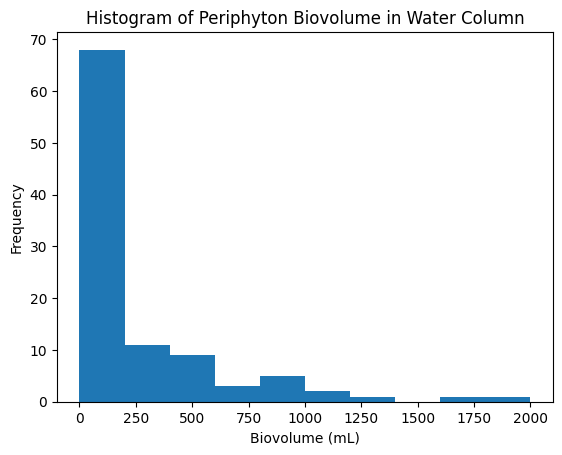

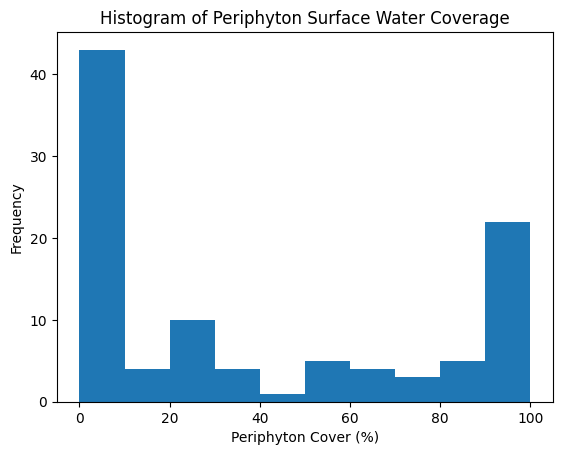

In [8]:
#-----------------------------IMPORTS-----------------------------

import re
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

#------------------------DEFINING VARIABLES------------------------

first = True

headers = []
newheaders = []
LoL = []

counter = 0

file = open("epa_everglades_emap_2014_data.csv")

#------------------------DATA ORGANIZATION------------------------

for line in file:
    rawdata = line.split(",") #splits the tsv by its delimiter
    data = [item.strip("\ufeff") and item.strip("\n") for item in rawdata] #removes newline and unicode character from each line of data
    if first == True:
        headers = headers + data 
        first = False
    else:  
        newlist = [] #creates a list for each line in the file
        for x in range(0,64):
            if re.search("[a-zA-Z]", data[x]): #if there is any letter found in the data, do not add it to list
                continue
            elif counter < 45:
                newheaders.append(headers[x]) #creates a new headers list with only numerical variables
                counter += 1
            if re.search("[a-zA-Z]", data[x]):
                continue
            else:
                newlist.append(float(data[x])) #adds numerical sample data to a list
        LoL.append(newlist) #appends each list of sample data into a list of lists
        
    
npArr = np.array(LoL) #turns list of lists into numpy array
LoL_TP = np.transpose(npArr) #flips columns and rows to get desired format

      
#------------------------DATA DESCRIPTION------------------------

#list index 42 corresponds to biovolume and index 41 corresponds to periphyton cover

biomean = np.mean(LoL_TP[42])
print(newheaders[42], "mean:", round(biomean,2))

perimean = np.mean(LoL_TP[41])
print(newheaders[41], "mean:", round(perimean,2))

print("\n")

biomedian = np.median(LoL_TP[42])
print(newheaders[42], "median:", round(biomedian,2))

perimedian = np.median(LoL_TP[41])
print(newheaders[41], "median:", round(perimedian,2))

print("\n")

biostd = np.std(LoL_TP[42])
print(newheaders[42], "standard deviation:", round(biostd,2))

peristd = np.std(LoL_TP[41])
print(newheaders[41], "standard deviation:", round(peristd,2))

print("\n")

plt.hist(LoL_TP[42])
plt.xlabel('Biovolume (mL)')
plt.ylabel('Frequency')
plt.title('Histogram of Periphyton Biovolume in Water Column')
plt.show()

plt.hist(LoL_TP[41])
plt.xlabel('Periphyton Cover (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Periphyton Surface Water Coverage')
plt.show()

Pearson Correlation Coefficient: 0.585
Spearman Correlation Coefficient: 0.797


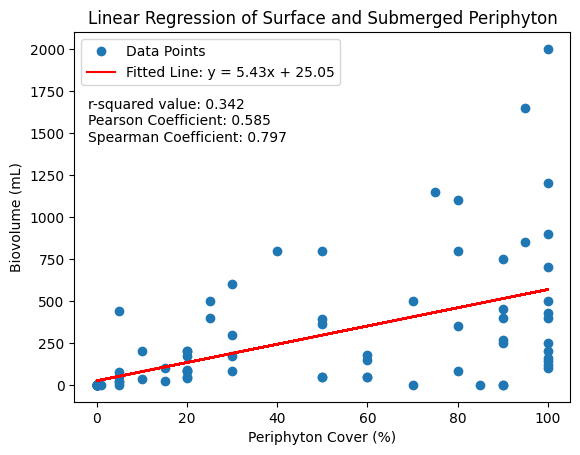

In [9]:
#------------------------CORRELATION COEFFICIENTS------------------------

pearson = stats.pearsonr(LoL_TP[41],LoL_TP[42]) #finds pearson correlation between biovolume and percent cover
spearman = stats.spearmanr(LoL_TP[41],LoL_TP[42]) #finds spearman correlation between biovolume and percent cover

print("Pearson Correlation Coefficient:", round(pearson.statistic,3))
print("Spearman Correlation Coefficient:", round(spearman.statistic,3))

#------------------------LINEAR REGRESSION------------------------

LR = stats.linregress(LoL_TP[41],LoL_TP[42]) #performs linear regression

plt.plot(LoL_TP[41], LoL_TP[42], 'o', label='Data Points') #plots data from each list against each other
plt.plot(LoL_TP[41], LR.intercept + LR.slope*LoL_TP[41], 'r', label='Fitted Line: y = 5.43x + 25.05') #plots line of best fit
plt.legend()
plt.text(-2, 1450, 'r-squared value: 0.342\nPearson Coefficient: 0.585\nSpearman Coefficient: 0.797', fontsize = 10)
plt.title('Linear Regression of Surface and Submerged Periphyton')
plt.xlabel('Periphyton Cover (%)')
plt.ylabel('Biovolume (mL)')
plt.show()

Text(0, 0.5, 'PC2 (14.47%)')

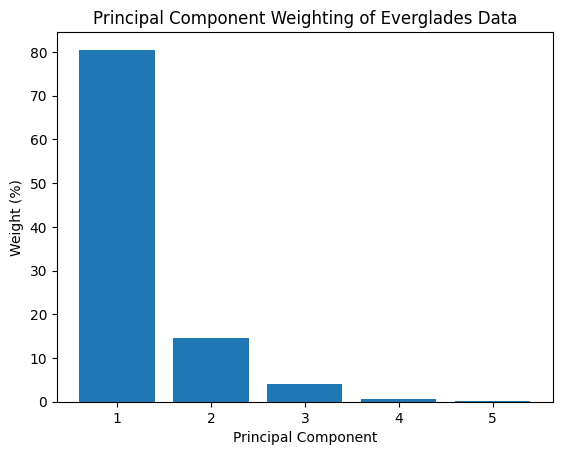

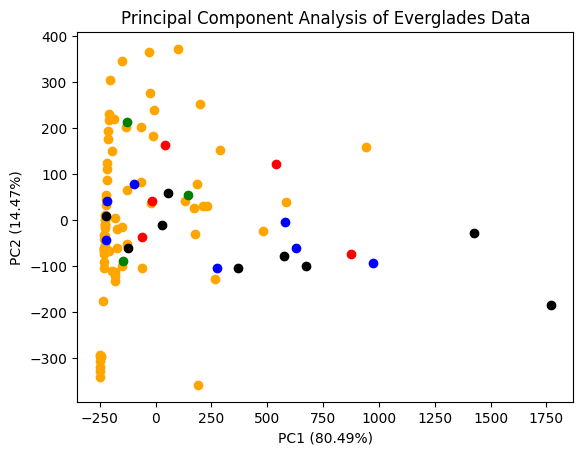

In [10]:
newdata = LoL_TP[4:] #removes first few columns like station number, logbook, and date that were messing with PCA. not true measured values

npArr = np.array(newdata) #turns list of lists into numpy array
data = np.transpose(npArr) #flips columns and rows back to get desired format

pca = PCA(n_components=41)
principal_components = pca.fit_transform(data) #preparing data for plot

plt.bar([1,2,3,4,5], pca.explained_variance_ratio_[0:5]*100) #plots first five principal components
plt.title('Principal Component Weighting of Everglades Data')
plt.xlabel('Principal Component')
plt.ylabel('Weight (%)')
plt.show

fig, ax = plt.subplots()

counter = -1

peat = []
peatl = []
marl = []
marll = []
sand = []
other = []
peato = []
marlo = []
mix = []

#sorts by 9 different soil types! when the number corresponding to a type is encountered, add the index a list
#input these lists into PCA scatter plot to color code data

for item in data:
    counter += 1
    if item[36] == 1:
        peat.append(counter)
    if item[36] == 2:
        peatl.append(counter)
    if item[36] == 3:
        marl.append(counter)
    if item[36] == 4:
        marll.append(counter)
    if item[36] == 5:
        sand.append(counter)
    if item[36] == 6:
        other.append(counter)
    if item[36] == 7:
        peato.append(counter)
    if item[36] == 8:
        marlo.append(counter)
    if item[36] == 9:
        mix.append(counter)
        
PCX = 0
PCY = 1

plt.title('Principal Component Analysis of Everglades Data')

ax.scatter(principal_components[peat, PCX], principal_components[peat , PCY], c="orange")  #peat is shown in orange
ax.scatter(principal_components[peatl , PCX], principal_components[peatl , PCY], c="brown")  #layered peat is shown in brown
ax.scatter(principal_components[marl , PCX], principal_components[marl , PCY], c="blue") #marl is shown in blue
ax.scatter(principal_components[marll , PCX], principal_components[marll , PCY], c="purple")  #layered marl is shown in purple
ax.scatter(principal_components[sand , PCX], principal_components[sand , PCY], c="pink") #sand is shown in pink
ax.scatter(principal_components[other , PCX], principal_components[other , PCY], c="yellow") #other soil types are in yellow
ax.scatter(principal_components[peato , PCX], principal_components[peato , PCY], c="green") #peat over marl is shown in green
ax.scatter(principal_components[marlo , PCX], principal_components[marlo , PCY], c="red") #marl over peat is shown in red
ax.scatter(principal_components[mix , PCX], principal_components[mix , PCY], c="black") #mixed marl and peat is black

ax.set_xlabel("PC1 (" + str(np.round(pca.explained_variance_ratio_[0]*100, decimals=2)) + "%)")
ax.set_ylabel("PC2 (" + str(np.round(pca.explained_variance_ratio_[1]*100, decimals=2)) + "%)")